In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [2]:
path = '../../../KU/Bachelor+Research/Data/Piccaro/'
dates = ['07042024']

data = read_data_picarro(path, dates)
display(data)

c:\Users\nan25\OneDrive\Dokumenter\GitHub\Metal-chlorides\ISAMO\..\Functions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Seconds'] = new_df['Seconds'] - new_df['Seconds'][0]


{'07042024':             DATE          TIME  FRAC_DAYS_SINCE_JAN1  FRAC_HRS_SINCE_JAN1  \
 0     2024-04-07  16:22:16.884             97.723807          2345.371357   
 1     2024-04-07  16:22:21.381             97.723859          2345.372606   
 2     2024-04-07  16:22:25.831             97.723910          2345.373842   
 3     2024-04-07  16:22:31.108             97.723971          2345.375308   
 4     2024-04-07  16:22:35.552             97.724023          2345.376542   
 ...          ...           ...                   ...                  ...   
 1405  2024-04-07  18:13:02.082             97.800719          2347.217245   
 1406  2024-04-07  18:13:06.529             97.800770          2347.218481   
 1407  2024-04-07  18:13:11.744             97.800830          2347.219929   
 1408  2024-04-07  18:13:16.178             97.800882          2347.221161   
 1409  2024-04-07  18:13:20.605             97.800933          2347.222391   
 
         EPOCH_TIME  ALARM_STATUS  INST_STATUS  Ca

In [3]:
time_stamps = np.array([['17:36:31', '17:46:32', '17:51:31', '18:01:31', '18:06:34', '18:11:32']])
exp_keys = np.array([['before 070424', 'lamp 070424', 'after 070424']])

exp_treat = get_treatment_dict(data, time_stamps, exp_keys)
display(exp_treat.keys())

[[ 942. 1069. 1132. 1259. 1323. 1386.]]


dict_keys(['before 070424', 'lamp 070424', 'after 070424'])

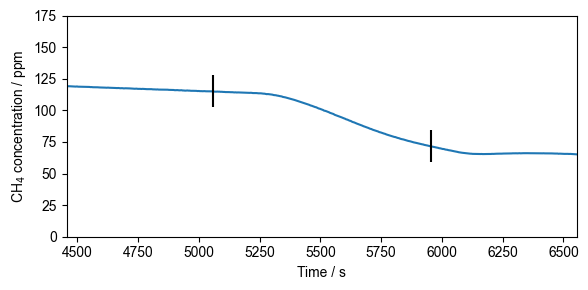

In [4]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(data['07042024']['Seconds'], data['07042024']['HR_12CH4'])
ax.scatter(data['07042024']['Seconds'][1069], data['07042024']['HR_12CH4'][1069], marker = '|', s = 500, color = 'k', zorder = 10)
ax.scatter(data['07042024']['Seconds'][1259], data['07042024']['HR_12CH4'][1259], marker = '|', s = 500, color = 'k', zorder = 10)

ax.set(xlim = (data['07042024']['Seconds'][942], data['07042024']['Seconds'][1386]), ylim = (0, 175),
       xlabel = 'Time / s', ylabel = 'CH$_{4}$ concentration / ppm')

# formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
# ax.xaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig('Full_exp.jpg', dpi = 600)
plt.show()

In [5]:
a_guess = np.array([-0.005, -0.005, -0.005])
b_guess = np.zeros(3) + 100

a, b, ea, eb, Chi2, ndf, prob = fit_exp(exp_treat, a_guess, b_guess)

before 070424  Fit: tau=-0.000059+-0.00002576  c_0=119.079+-1.059  p=1.000000
lamp 070424  Fit: tau=-0.000767+-0.00002584  c_0=223.493+-6.988  p=1.000000
after 070424  Fit: tau=-0.000030+-0.00007440  c_0=69.798+-10.134  p=1.000000


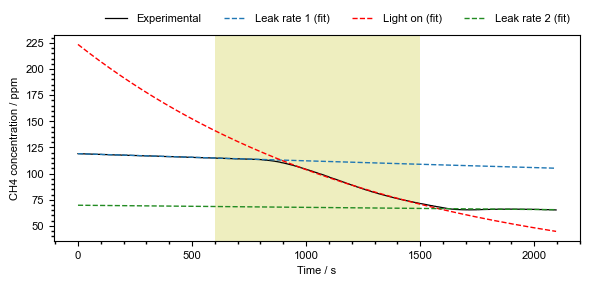

In [6]:
labels_full = ['Experimental', 'Leak rate 1 (fit)', 'Light on (fit)', 'Leak rate 2 (fit)']
fig, ax = plt.subplots(figsize = (6, 3))

plot_full_exp(ax, data['07042024'], a, b, [942, 1386], [1069, 1259])
ax.legend(labels = labels_full, frameon = False, fontsize = 8, ncol = 4, bbox_to_anchor = (1, 1.15))

fig.tight_layout()
fig.savefig('Full_exp_wFit.jpg', dpi = 600)
plt.show()

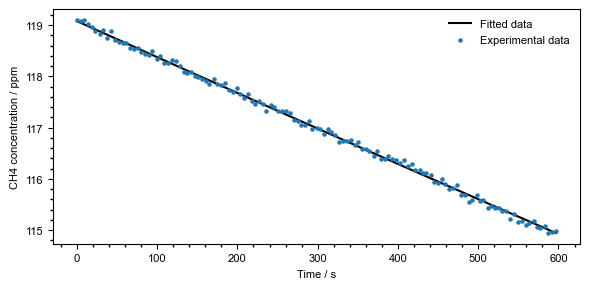

In [7]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_before_lamp(ax, exp_treat, a[0], b[0], 'before 070424')

fig.tight_layout()
fig.savefig('leak1.jpg', dpi = 600)
plt.show()

before radiation:  106.08910547415651 +- 5.411660103854399
after radiation:  65.84450056338747 +- 13.513372385033854


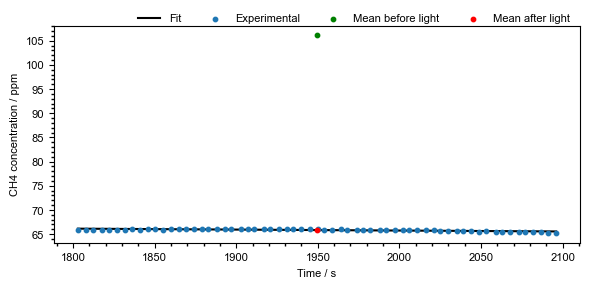

In [8]:
labels_after = ['Fit', 'Experimental', 'Mean before light', 'Mean after light']
fig, ax = plt.subplots(figsize = (6, 3))

exp1_y1, exp1_ey1, exp1_y2, exp1_ey2 = plot_mean_conc(ax, exp_treat['after 070424'], [a[0], a[2]], [b[0], b[2]], [ea[0], ea[2]], [eb[0], eb[2]])
ax.legend(labels = labels_after, frameon = False, fontsize = 8, bbox_to_anchor = (1, 1.1), ncol = 4)

fig.tight_layout()
fig.savefig('leak2.jpg', dpi = 600)
plt.show()